In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from scipy.spatial.distance import pdist

In [2]:
# load in csv to look at 
annot = pd.read_csv("all_annotated.csv")
annot

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [3]:
# limiting dataset to median expression across 
annot['count'] = annot.astype(bool).sum(axis=1) - 2
med_vals = annot[annot['count'] > 8].iloc[:,:-1]

In [4]:
med_vals

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,11.151757,0.391747,4.240487,93.574127,87.244370,22.549498,73.099991,56.537510,41.339439,0.285725,22.376423,93.960289,269.186951,22.976255,32.563301,218.131927
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090


In [5]:
transform = med_vals.iloc[:,:2].join(np.log2(med_vals.iloc[:,2:] + 0.1)).reset_index().iloc[:,1:]
transform

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
1,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
2,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
3,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
4,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8150,FBtr0100879,mt:ND4,3.492078,-1.024012,2.117857,6.549579,6.448643,4.501407,6.193772,5.823686,5.372933,-1.374355,4.490341,6.555514,8.073001,4.528337,5.029599,7.769718
8151,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
8152,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
8153,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [44]:
# cluster by gene
gene_clustered = linkage(transform.iloc[:,2:])
transform["gene_cluster"] = leaves_list(gene_clustered)
trans_sort_gene = transform.sort_values(by=['gene_cluster']).iloc[:,:-1]

# cluster by sample
samp_cluster = linkage(trans_sort_gene.T.iloc[2:,:])
subset = trans_sort_gene.T.iloc[2:,:]


# subset of trans_sort_gene
subset_trans = trans_sort_gene.iloc[:,2:]
subset_trans.loc[8155] = leaves_list(samp_cluster)
clustered = trans_sort_gene.iloc[:,:2].join(subset_trans.sort_values(by=8155, axis=1))



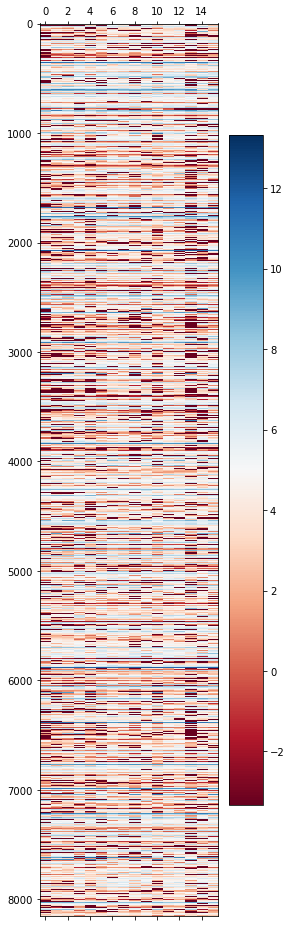

In [53]:
plt.matshow(clustered.iloc[:,2:], cmap='RdBu', aspect='auto') #, interpolation='nearest')
plt.colorbar()